In [423]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/arimorcos/Github/getRedditDataset/')
from celebReddit import countMisspellings, countWords
import redditDB
import datetime
from matplotlib import pyplot as pp
from matplotlib import colorbar as cb
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as PD
import scipy
from scipy import spatial
from sklearn import cluster, decomposition
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [386]:
""" Establish database connection """
db = redditDB.RedditDB('March2-8_Top200')

In [387]:
""" Get comments from subreddits """
subList = db.getSubreddits()
comments = db.getSubredditCommentText(subList[0])

In [388]:
""" Strip formatting """ 
comments = [''.join(s for s in comment if ord(s)>31 and ord(s)<126) for comment in comments]

In [389]:
""" Concatenate all comments together and split into individual words """ 
allComments = " ".join(comments)
allWords = allComments.split()
allWords = [word.lower() for word in allWords]

In [390]:
""" Enumerate words to get list and values """
def countNWords(allWords):
    wordCounts = {}
    for word in allWords:
        if word in wordCounts:
            wordCounts[word] += 1 
        else: 
            wordCounts[word] = 1
    return wordCounts

In [391]:
""" sort by values and get 100 most frequent words""" 
sortedWords = sorted(wordCounts, key=wordCounts.get, reverse=True)
mostFreqWords = sortedWords[0:100]

In [392]:
freqWordCounts = [wordCounts[word] for word in mostFreqWords]

In [393]:
usedSubs = subList[0:50]
allCounts = np.zeros(shape=(len(mostFreqWords) ,len(usedSubs)))
subInd = 0
for sub in usedSubs: 
    
    # get comments 
    comments = db.getSubredditCommentText(sub)
    comments = [''.join(s for s in comment if ord(s)>31 and ord(s)<126) for comment in comments]
    
    # convert to all words
    allComments = " ".join(comments)
    allWords = allComments.split()
    allWords = [word.lower() for word in allWords]
    
    # count words 
    wordCounts = countNWords(allWords)
    
    # get total words 
    totWords = float(len(allWords))
    
    # get freqWordCounts 
    freqWordCounts = [wordCounts[word] if word in wordCounts else 0 for word in mostFreqWords ]
    freqWordCounts = [i/totWords for i in freqWordCounts]
    
    # concatenate 
    allCounts[:,subInd] = freqWordCounts
    
    # increment subInd
    subInd += 1    

In [394]:
""" get pairwise distance """
normMax = np.max(allCounts, axis=1)
normCounts = np.transpose(np.divide(np.transpose(allCounts), normMax))
distVec = spatial.distance.pdist(np.transpose(normCounts), 'euclidean')
distMat = spatial.distance.squareform(distVec)

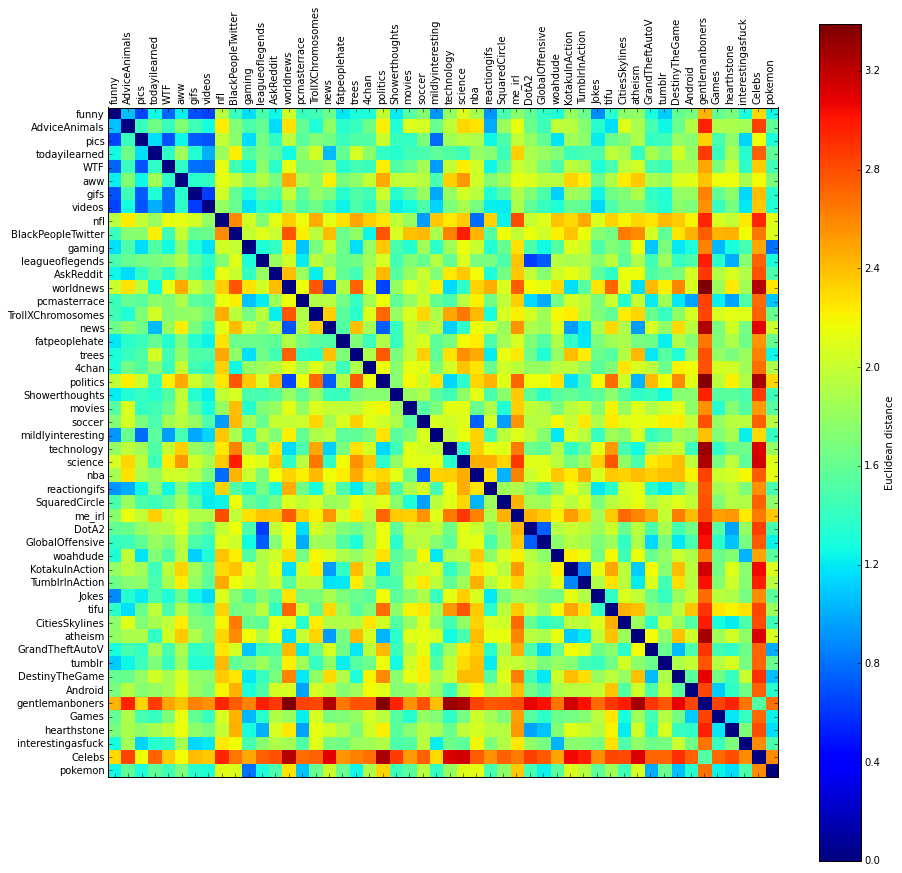

In [396]:
fig, ax = pp.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
tempMat = distMat.copy()
tempMat[tempMat > 4] = 4.
axMat = ax.matshow(tempMat)
ax.set_xticks(range(len(distMat)))
ax.set_xticklabels(subList, rotation=90);
ax.set_yticks(range(len(distMat)))
ax.set_yticklabels(subList);
cbar = fig.colorbar(axMat)
cbar.set_label('Euclidean distance')

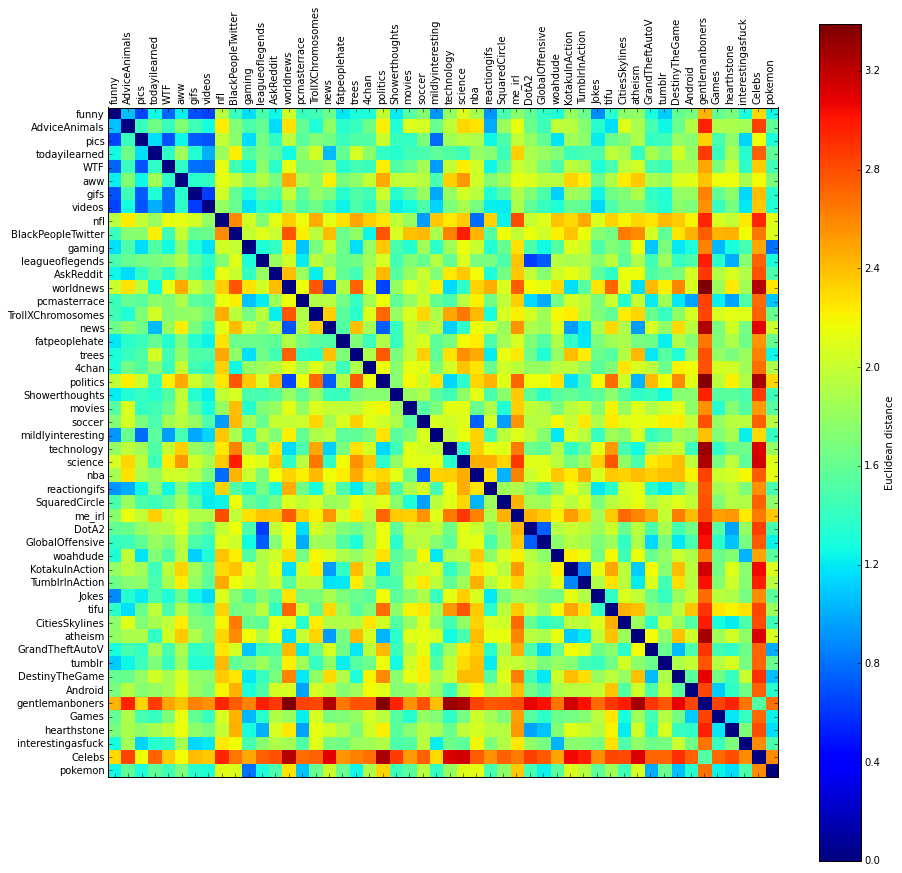

In [397]:
fig, ax = pp.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
axMat = ax.matshow(distMat)
ax.set_xticks(range(len(distMat)))
ax.set_xticklabels(subList, rotation=90);
ax.set_yticks(range(len(distMat)))
ax.set_yticklabels(subList);
cbar = fig.colorbar(axMat)
cbar.set_label('Euclidean distance')

In [398]:
""" Plot most 10 most similar pairs"""
x = distMat.copy()
np.fill_diagonal(x, np.inf)
for ind in range(30):
    minInd = np.argmin(x)
    inds = np.unravel_index(minInd, distMat.shape)
    print usedSubs[inds[0]] + ', ' + usedSubs[inds[1]] + ': ' + str(x[inds])
    x[inds] = np.inf
    x[inds[1], inds[0]] = np.inf

gifs, videos: 0.630009207836
leagueoflegends, DotA2: 0.634286306407
worldnews, politics: 0.653067712207
funny, pics: 0.656506464078
funny, videos: 0.658252580305
funny, gifs: 0.691578358871
pics, videos: 0.70398856224
pics, WTF: 0.708990683639
worldnews, news: 0.712693534923
news, politics: 0.73071810441
pics, gifs: 0.735347538181
leagueoflegends, GlobalOffensive: 0.739743084353
DotA2, GlobalOffensive: 0.743920031368
soccer, nba: 0.754218964712
funny, WTF: 0.75826541073
WTF, videos: 0.78369459027
pics, mildlyinteresting: 0.791591299056
nfl, nba: 0.794648138151
WTF, gifs: 0.794926625515
gaming, pokemon: 0.802345405117
KotakuInAction, TumblrInAction: 0.880385991556
funny, Jokes: 0.899618736612
funny, reactiongifs: 0.920894201771
funny, mildlyinteresting: 0.934231963677
news, atheism: 0.941171458688
news, KotakuInAction: 0.946449192088
nfl, soccer: 0.949510411674
WTF, mildlyinteresting: 0.950341053391
soccer, SquaredCircle: 0.966564616524
pcmasterrace, Android: 0.97021976849


In [399]:
""" Plot most 10 most dissimilar pairs"""
x = distMat.copy()
np.fill_diagonal(x, -1*np.inf)
for ind in range(30):
    maxInd = np.argmax(x)
    inds = np.unravel_index(maxInd, distMat.shape)
    print usedSubs[inds[0]] + ', ' + usedSubs[inds[1]] + ': ' + str(x[inds])
    x[inds] = -1*np.inf
    x[inds[1], inds[0]] = -1*np.inf

worldnews, gentlemanboners: 3.39073174852
politics, gentlemanboners: 3.37236092184
technology, gentlemanboners: 3.29959022065
atheism, gentlemanboners: 3.27390932163
politics, Celebs: 3.25889098294
science, gentlemanboners: 3.25193740653
news, gentlemanboners: 3.23557340628
worldnews, Celebs: 3.22284963269
science, Celebs: 3.14596441551
KotakuInAction, gentlemanboners: 3.13975108056
atheism, Celebs: 3.11552482686
technology, Celebs: 3.11538445084
news, Celebs: 3.08863806388
DestinyTheGame, gentlemanboners: 3.08508000602
DotA2, gentlemanboners: 3.08272372396
KotakuInAction, Celebs: 3.0524102543
GlobalOffensive, gentlemanboners: 3.02412601818
TumblrInAction, gentlemanboners: 3.02265563113
CitiesSkylines, gentlemanboners: 2.98174267989
TumblrInAction, Celebs: 2.9690886743
BlackPeopleTwitter, science: 2.96864859439
leagueoflegends, gentlemanboners: 2.96807606308
Showerthoughts, gentlemanboners: 2.96196751766
AdviceAnimals, gentlemanboners: 2.95899352408
gentlemanboners, hearthstone: 2.9559

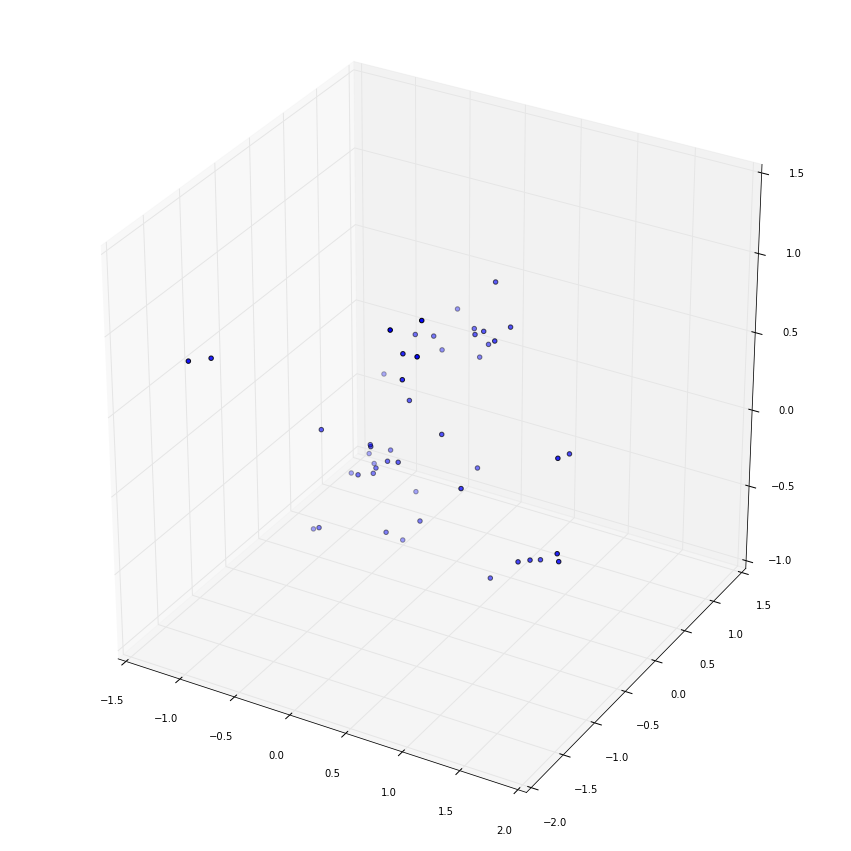

In [427]:
""" perform pca """
pcaObj = decomposition.PCA(n_components=3)
reducedCounts = pcaObj.fit_transform(normCounts.transpose())
fig = pp.figure(figsize=(15,15))
ax = pp.subplot(projection='3d')
ax.scatter(reducedCounts[:,0], reducedCounts[:,1], reducedCounts[:,2])

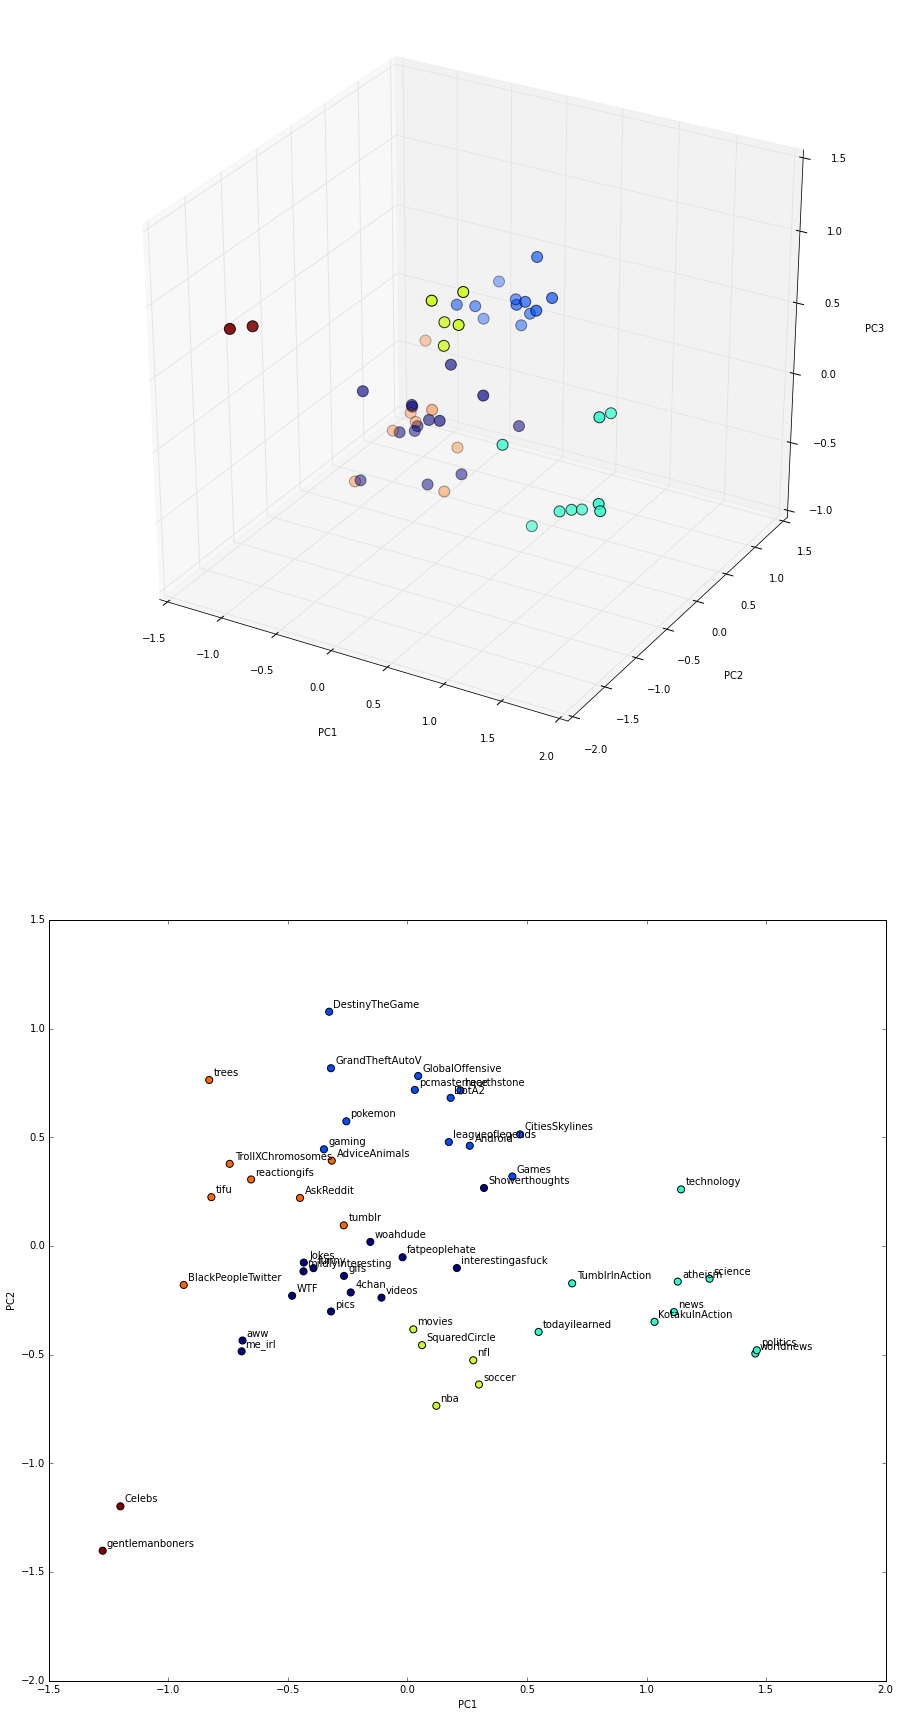

In [462]:
""" cluster points """
apObj = cluster.AffinityPropagation(damping=0.75)
apObj.fit(reducedCounts)

# plot 3d
fig = pp.figure(figsize=(15,30))
ax = pp.subplot(2,1,1, projection='3d')
ax.scatter(reducedCounts[:,0], reducedCounts[:,1], reducedCounts[:,2], s=120, c=apObj.labels_)
ax.set_xlabel('PC1'); ax.set_ylabel('PC2'); ax.set_zlabel('PC3')

#plot 2d 
ax2 = pp.subplot(2,1,2)
ax2.scatter(reducedCounts[:,0], reducedCounts[:,1], s=50, c=apObj.labels_)
ax2.set_xlabel('PC1'); ax2.set_ylabel('PC2')

# label points 
for point in range(len(usedSubs)):
    ax2.text(reducedCounts[point,0]+0.02, reducedCounts[point,1]+0.02, usedSubs[point])
